## Looking at KOF index vs. Eurovision votes

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
kof = pd.read_csv(os.path.join('data',r'KOF_globalization_modified.csv'))
kof = kof[["country", "KOFGI","year"]] # we're interested in just 'KOFGI' (see the explanation in 'KOF_globalisation_index_script' for why)

votes = pd.read_csv(os.path.join('data',r'votes_dataset_clean.csv'))

ranks = pd.read_csv(os.path.join('data',r'cleaned_wikipedia_songs.csv'))
ranks = ranks[["year","country","rank"]]

#### Getting only data between 1975 and 2016 in votes database

In [3]:
year_range = (1975, 2016)

votes = votes[(votes['Year'] >= year_range[0]) & (votes['Year'] <= year_range[1])]
kof = kof[(kof['year'] >= year_range[0]) & (kof['year'] <= year_range[1])]
    
countries_to_exclude = set(['Bosnia', 'Serbia & Montenegro', 'Yugoslavia'])  # Australia
country_filter = [(votes['From country'][i] not in countries_to_exclude) and
                  (votes['To country'][i] not in countries_to_exclude)
                  for i in votes.index]
votes = votes[country_filter]

# Filter out televoting for consistency (only in 2016)
votes = votes[votes['Jury or Televoting'] == 'J']

print(votes.head())
print(kof.head())

   Year (semi-) final Jury or Televoting From country To country  Points
0  1975             f                  J      Belgium    Belgium       0
1  1975             f                  J      Belgium    Finland       0
2  1975             f                  J      Belgium     France       2
3  1975             f                  J      Belgium    Germany       0
4  1975             f                  J      Belgium    Ireland      12
   country      KOFGI  year
5  Andorra  45.609665  1975
6  Andorra  45.992718  1976
7  Andorra  47.634552  1977
8  Andorra  47.870274  1978
9  Andorra  47.895931  1979


#### Rreformat the dataframes to make sure that the values from ranks and kof are consistent with votes

In [82]:
total_points = votes.groupby(['To country', 'Year']).sum()

# rename the votes columns to be the same as the corresponding columns in kof
total_points.reset_index(inplace=True) 
total_points.rename(columns = {'To country':'country', 'Year':'year' }, inplace = True) 

# rename kof's countries to be consistent with total_points's countries
spellingChanges = {'Bosnia and Herzegovina': 'Bosnia & Herzegovina',
                  'Macedonia, FYR': 'F.Y.R. Macedonia',
                  'Netherlands': 'The Netherlands',
                  'Russian Federation': 'Russia',
                  'Slovak Republic': 'Slovakia'}
for c in spellingChanges:
    kof['country'] = kof['country'].replace([c], spellingChanges[c])

# rename rank's countries to be consisten with total_point's countries
ranks['country'] = ranks['country'].str.strip()
spellingChanges =  {'Bosnia and Herzegovina': 'Bosnia & Herzegovina',
                  'Macedonia, FYR': 'F.Y.R. Macedonia',
                  'Netherlands': 'The Netherlands',
                  'Russian Federation': 'Russia',
                  'Slovak Republic': 'Slovakia'}
for c in spellingChanges:
    ranks['country'] = ranks['country'].replace([c], spellingChanges[c])
    filterCountries = (~ranks["country"].isin(["Yugoslavia","Serbia and Montenegro"]))
    ranks = ranks[filterCountries]

#getting KOF and points in the same df
joined_df = pd.merge(total_points, kof,  how='left', left_on=['country','year'], right_on = ['country','year'])
#adding ranks to that df
joined_df = pd.merge(joined_df, ranks, how='left',left_on=['country','year'], right_on = ['country','year'])

#tempoorary
joined_df["rank"] = joined_df["rank"].fillna("other").astype(str)

76.54258216299662
              year      Points      KOFGI
rank                                     
1.0    1995.658537  244.707317  76.542582
2.0    1995.292683  196.268293  74.622273
3.0    1995.500000  189.166667  73.510122
4.0    1996.025000  156.325000  72.434030
5.0    1995.244444  142.511111  75.042902
other  1999.780461   58.126235  73.814239


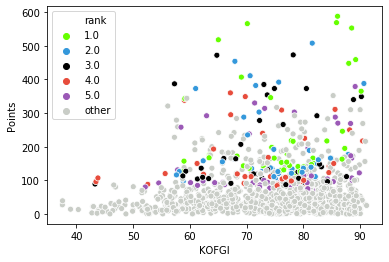

In [132]:
# setting the colors
flatui = ["#66ff00", "#3498db", "#000000", "#e74c3c", "#9b59b6", "#C9CDC7"]
sns.set_palette(flatui)

#plotting
g = sns.scatterplot(x="KOFGI", y="Points",data=joined_df,hue='rank',hue_order = ['1.0','2.0','3.0','4.0','5.0','other'],\
               )

rank1 = joined_df[joined_df["rank"] == '1.0']
print(rank1["KOFGI"].mean())

print(joined_df.groupby("rank").mean())

### Analysis of KOF Index vs. Votes

As shown by the closeness in the mean number of points that songs in each rank category (1, 2, 3, 4, 5, other) scored, there is no statistically significant correlation between Eurovision rank and KOF. This means that geographical and cultural ties are probably more correlated to Eurovision voting / win patterns than merely how much a country is globalized to the rest of the world in general (which is what KOF measures).
